In [2]:
## 자동미분

import torch


In [37]:
#Requires_grad (## x -> y -> z)

x=torch.ones(3, requires_grad=True)
print(x)
print(x.requires_grad)    # False는 자동미분을 할 준비가 안되있다. 라는 뜻

tensor([1., 1., 1.], requires_grad=True)
True


In [38]:
y=2*x
print(y)
print(y.grad)
print(y.grad_fn)    #grad_fn: 어떤 연산이 되었는지 추적
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12644\2266282404.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [39]:
z=y**2

print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
None
True


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12644\3370967056.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(z.grad)


In [40]:
# backward(역전파) (## z -> y -> x)

result=z.sum()
result.backward()


In [ ]:
print(z)
print(x.grad)    # 역전파 결과
print(z.grad)


tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])
None


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12644\2207702971.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(z.grad)    # 역전파 결과


In [ ]:
## no_grad(): 역전파(자동미분)를 중지

x=torch.tensor(1.0, requires_grad=True)
y=x**2

print(x.requires_grad)
print(y.requires_grad)    # 역전파 할 준비 됨

with torch.no_grad():
    x=torch.tensor(1.0, requires_grad=True)
    y=x**2

    print(x.requires_grad)
    print(y.requires_grad)

True
True
True
False


In [50]:
## detach()

y.detach()

tensor(1.)

Epoch: 100/1000, Loss:  4.0633
Epoch: 200/1000, Loss:  3.8435
Epoch: 300/1000, Loss:  3.7623
Epoch: 400/1000, Loss:  3.7323
Epoch: 500/1000, Loss:  3.7212
Epoch: 600/1000, Loss:  3.7171
Epoch: 700/1000, Loss:  3.7155
Epoch: 800/1000, Loss:  3.7150
Epoch: 900/1000, Loss:  3.7148
Epoch: 1000/1000, Loss:  3.7147


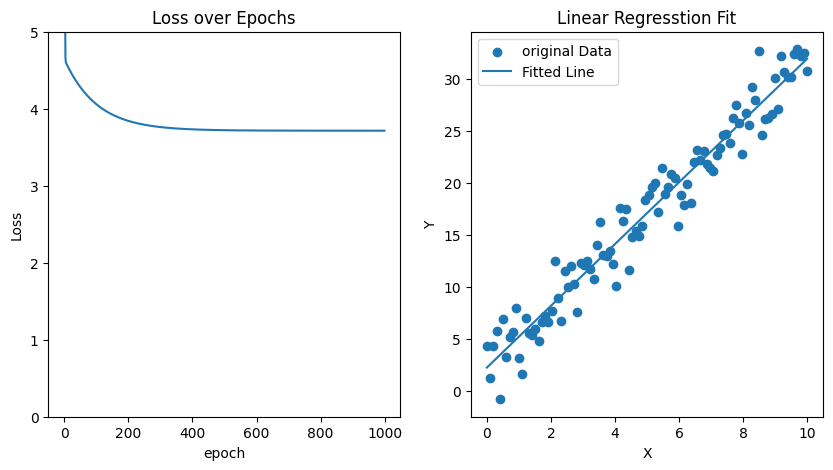

model parameter
linear.weight Parameter containing:
tensor([[2.9693]], requires_grad=True)
linear.bias Parameter containing:
tensor([2.2506], requires_grad=True)
None


In [ ]:
## 실습: 선형 회귀 실습

# 1. 데이터 입출력 정의
x=torch.linspace(0, 10, 100).view(-1, 1)    #0~10사이의 값 100개 생성후 데이터 형태 성형
y=3*x+2+torch.randn(100,1)*2    # 랜덤한 값 생성 + 노이즈 생성


# 2. 모델 정의 (x와 y 사이의 관계를 맞추는 모델 생성)
import torch.nn as nn
class LinearRegressionModel(nn.Module):    # 패키지에서 상속 받아오기
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear=nn.Linear(1,1)    # 입 출력 데이터 갯수
    
    def forward(self, x):
        out=self.linear(x)     # 활성화함수 정의(여기서는 linear: 그대로 내보낸다.)
        return out


model=LinearRegressionModel()


# 3. 손실함수 정의(MSE)
loss_function=nn.MSELoss()


# 4. 가중치 업데이트(경사 하강법)
import torch.optim as optim
optimizer=optim.SGD(model.parameters(), lr=0.01)    # [가중치, 편향], Lr: Learning rate


# 5. 학습 반복
epochs=1000            # 반복수
losses=[]              # 손실을 넣을 변수

for epoch in range(epochs):
    optimizer.zero_grad()                   # 반복마다 기울기 초기화
    outputs=model(x)                        # 결과값
    loss=loss_function(outputs, y)          # 손실 계산
    loss.backward()                         # 역전파
    optimizer.step()                        # 가중치 업데이트
    losses.append(loss.item())              # 손실값 저장

    if (epoch+1)%100==0:
        print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item(): .4f}')


# 6. 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))


# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title('Loss over Epochs')
plt.xlabel('epoch')
plt.ylabel('Loss')


# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label='original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), label='Fitted Line')
plt.title('Linear Regresstion Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# 최종 모델 파라미터 확인
print('model parameter')
for name, param in model.named_parameters():
    print(name, param)

Epoch: 100/1000, Loss:  4.8881
Epoch: 200/1000, Loss:  4.2907
Epoch: 300/1000, Loss:  3.8884
Epoch: 400/1000, Loss:  3.5701
Epoch: 500/1000, Loss:  3.3178
Epoch: 600/1000, Loss:  3.1175
Epoch: 700/1000, Loss:  2.9586
Epoch: 800/1000, Loss:  2.8324
Epoch: 900/1000, Loss:  2.7321
Epoch: 1000/1000, Loss:  2.6522


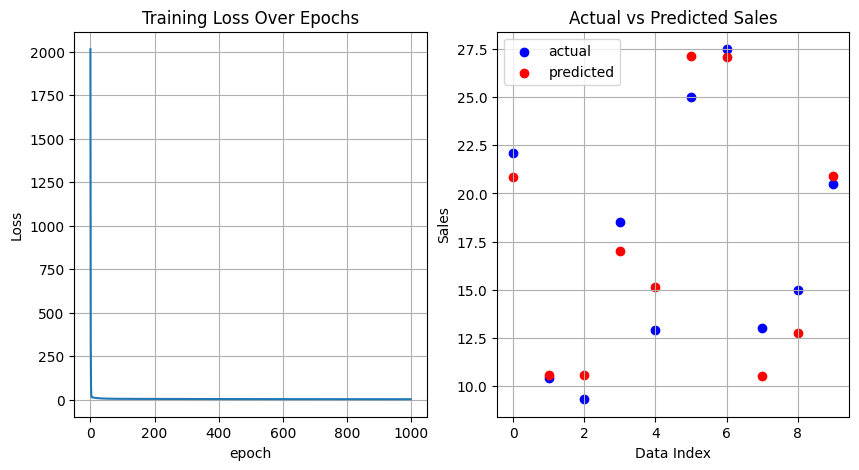

학습된 모델의 파라미터
linear.weight Parameter containing:
tensor([[0.2053, 0.3564, 0.0634]], requires_grad=True)
linear.bias Parameter containing:
tensor([-0.2058], requires_grad=True)



In [ ]:
## 실습: 다중 선형 회귀 실습


# 1. 데이터 입출력 정의
import torch
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)


# 2. 모델 정의
import torch.nn as nn
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear=nn.Linear(3,1)

    def forward(self, x):
        out=self.linear(x)     # 활성화함수 정의(여기서는 linear: 그대로 내보낸다.)
        return out


model=MultipleLinearRegression()


# 3. 손실함수 정의(MSE)
loss_function=nn.MSELoss()


# 4. 가중치 업데이트(경사 하강법)
import torch.optim as optim
optimizer=optim.SGD(model.parameters(), lr=0.0001)    # [가중치, 편향], Lr: Learning rate


# 5. 학습 반복
epochs=1000            # 반복수
losses=[]              # 손실을 넣을 변수

for epoch in range(epochs):
    optimizer.zero_grad()                   # 반복마다 기울기 초기화
    outputs=model(x)                        # 결과값
    loss=loss_function(outputs, y)          # 손실 계산
    loss.backward()                         # 역전파
    optimizer.step()                        # 가중치 업데이트
    losses.append(loss.item())              # 손실값 저장

    if (epoch+1)%100==0:
        print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item(): .4f}')


# 6. 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))


# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
#plt.ylim(0, 5)
plt.title('Training Loss Over Epochs')
plt.xlabel('epoch')
plt.grid()
plt.ylabel('Loss')

acutal=y.numpy()
predicted=model(x).detach().numpy()

# 데이터와 예측 결과 시각화
import numpy as np
plt.subplot(1, 2, 2)
plt.scatter(range(len(acutal)), y.numpy(), label='actual', color='b')
plt.scatter(range(len(predicted)), model(x).detach().numpy(), label='predicted', color='r')    # detach는 기존의 모델에서 분리해 낸다라는 뜻. 계산시 없어도 상관 없음.
plt.title('Actual vs Predicted Sales')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.grid()
plt.legend()
plt.show()


# 최종 모델 파라미터 확인
print('학습된 모델의 파라미터')
for name, param in model.named_parameters():
    print(name, param)

Epoch: 100/1000, Loss:  0.4549
Epoch: 200/1000, Loss:  0.3516
Epoch: 300/1000, Loss:  0.3037
Epoch: 400/1000, Loss:  0.2764
Epoch: 500/1000, Loss:  0.2587
Epoch: 600/1000, Loss:  0.2464
Epoch: 700/1000, Loss:  0.2374
Epoch: 800/1000, Loss:  0.2305
Epoch: 900/1000, Loss:  0.2251
Epoch: 1000/1000, Loss:  0.2207


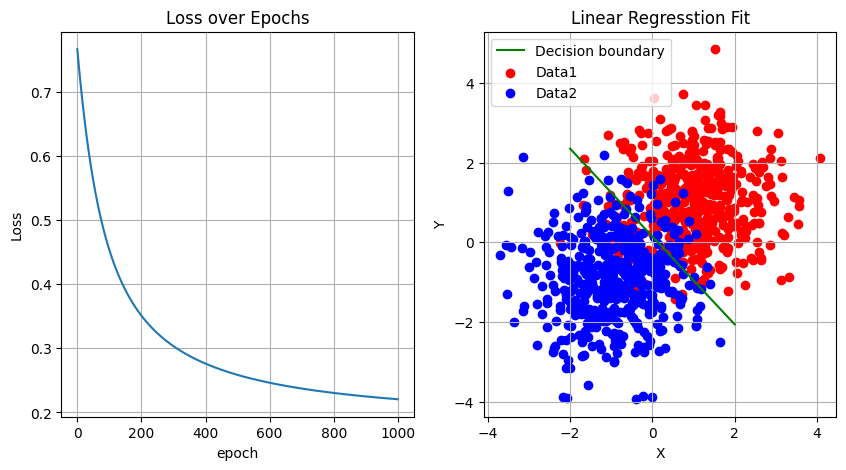

model parameter
weight [[1.2805383 1.1598911]]
bias [-0.1704181]


In [ ]:
# 실습: 로지스틱 회귀 구현
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 1. 입출력 정의
np.random.seed(42)    # 고정된 난수(랜덤값)를 생성
num_sample=500

# 1-1. class 1
mean_1=np.array([1.0, 1.0])
cov_1=np.array([[1,0],
               [0,1]])
data_1=np.random.multivariate_normal(mean_1, cov_1, num_sample)
# print(data_1)

# 1-2. class 0
mean_2=np.array([-1.0, -1.0])
cov_2=np.array([[1,0],
               [0,1]])
data_2=np.random.multivariate_normal(mean_2, cov_2, num_sample)
# print(data_2)

data=np.vstack((data_1, data_2))
data=torch.from_numpy(data).float()    # 텐서로 만들기
# print(data.shape)

labels=np.ones(num_sample*2)     # 정답값 만들기
labels[num_sample:]=0
labels=torch.from_numpy(labels).view(-1,1).float()
# print(labels.shape)


# 2. 모델 설정
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear=nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out=self.linear(x)
        out=torch.sigmoid(out)  # 시그모이드 함수
        return out
    

model=LinearRegression(2,1)

# 3. 손실함수 정의 :BCD
loss_fn=nn.BCELoss()


# 4. optimizer
optimizer=optim.SGD(model.parameters(), lr=0.01)
epochs=1000
losses=[]

for epoch in range(epochs):
    optimizer.zero_grad()                   # 반복마다 기울기 초기화
    outputs=model(data)                        # 결과값
    loss=loss_fn(outputs, labels)                # 손실 계산
    loss.backward()                         # 역전파
    optimizer.step()                        # 가중치 업데이트
    losses.append(loss.item())              # 손실값 저장

    if (epoch+1)%100==0:
        print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item(): .4f}')


# 6. 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))


# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.grid()
plt.title('Loss over Epochs')
plt.xlabel('epoch')
plt.ylabel('Loss')


# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)

w=model.linear.weight.data.numpy()
b=model.linear.bias.data.numpy()

x_plot=np.array([-2,2])
y_plot=(-b-w[0][0]*x_plot)/w[0][1]

plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
plt.scatter(data_1[:,0], data_1[:,1], label='Data1', color='r')
plt.scatter(data_2[:,0], data_2[:,1], label='Data2', color='b')
plt.title('Linear Regresstion Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()


# 최종 모델 파라미터 확인
print('model parameter')
print('weight',w)
print('bias',b)


In [20]:
# 실습: FashionMNIST 신경망

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

cuda


100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [36]:
# 2. 모델정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()    # CNN Flatten
        self.linear_relu_stack=nn.Sequential(     # layer 만들기
            nn.Linear(28*28,512),       # 입력층
            nn.BatchNorm1d(512),        # 배치정규화
            nn.ReLU(),
            nn.Linear(521,256),         # layer 1
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,64),          # layer 2
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,10),           # 출력층
        )
    
    def forward(self, x):
        out=self.flatten(x)
        out=self.linear_relu_stack(out)
        return out


model=NeuralNetwork()
# model.to(device)
# print(model)

# 3. 손실함수 정의
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)           # Adam을 가장 많이 씀

epochs=10

for epoch in range(epochs):
    print(f'epoch: {epoch+1} -------------------------------------------')
    size=len(train_dataloader.dataset)
    for batch, (x, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs=model(x)
        loss=loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        if batch % 100 ==0:
            loss=loss.item()
            current=batch*len(x)
            print(f'loss: {loss: .4f}, [{current}/{size}]')


test_size=len(test_dataloader.dataset)
num_batches=len(test_dataloader)
test_loss=0
correct=0


with torch.no_grid():
    for x, y in test_dataloader:
        x-x.to(device)
        y-y.to(device)
        outputs=model(x)
        test_loss+=loss_fn(outputs, y).item()
        correct+=(outputs.argmax(1) == y).type(torch.float).sum().item()
        
test_loss/=num_batches
correct/=test_size
print(f'Accuracy: {100*correct: .1f},Avg loss: {test_loss}')

epoch: 1 -------------------------------------------


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x512 and 521x256)

In [ ]:
# 실습 정답

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512), 
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256), 
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64), 
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용


# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

plot_img = input_img.squeeze().cpu().numpy()


import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis("off")

plt.tight_layout()
plt.show()

AttributeError: 'DataLoader' object has no attribute 'to'